# 필요한 모듈을 불러옵시다

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pydot

In [7]:
from plotnine import *
%matplotlib inline

In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN 

In [50]:
mushroom = pd.read_csv("mushrooms.csv")

# 전처리를 해야하는데...

In [203]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [11]:
mushroom.isnull().sum()
# 결측치가 없다

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# 이걸 섞어줘야한다고?

In [31]:
#import random

In [32]:
#df.shape

(8124, 23)

In [33]:
#ind = [i for i in range(8124)]

In [34]:
#random.shuffle(ind)

In [38]:
#mushroom = mushroom.iloc[ind,:]

### 전처리는 더미화 해줘서 모델링할때 편하게 합시다

In [51]:
MSR_Response = pd.get_dummies(mushroom['class']).iloc[:,-1] 

In [205]:
mushrooms = mushroom.iloc[:,1:]

In [206]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in mushrooms.columns:
    mushrooms[col] = labelencoder.fit_transform(mushrooms[col])

mushrooms.head()

/home/lds/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


# 그러면 바로 EDA를 시작합시다

In [16]:
df=mushroom

In [17]:
df["class"].count() # 왜 하셨을까? 음....행 갯수...? 아니면 독보섯 갯수를 알고 싶으셨나

8124

#### 버섯 분포

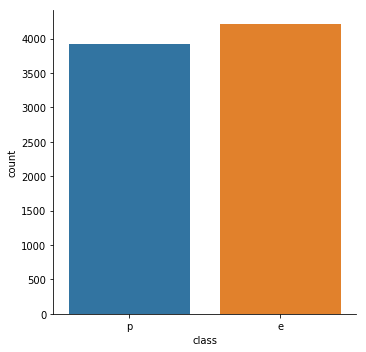

e    4208
p    3916
Name: class, dtype: int64

In [44]:
sns.catplot(x="class", data=df, kind="count", height=5, aspect=1)
plt.show()
df["class"].value_counts()

#### cap-shape 버섯 갓 모양

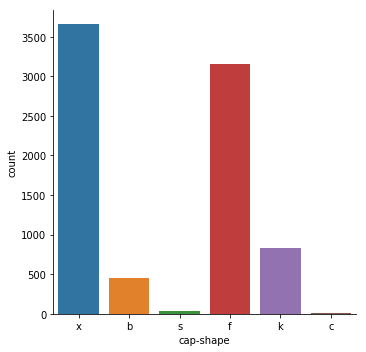

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [22]:
sns.catplot(x="cap-shape", data=df, kind="count", height=5, aspect=1)
plt.show()
df["cap-shape"].value_counts()

In [65]:
test_1 = pd.crosstab(index=df["cap-shape"], columns=df["class"])
test_1

class,e,p
cap-shape,,
b,404,48
c,0,4
f,1596,1556
k,228,600
s,32,0
x,1948,1708


In [66]:
y = pd.DataFrame(df.groupby("cap-shape")["class"].count())
y

,class
cap-shape,
b,452
c,4
f,3152
k,828
s,32
x,3656


In [93]:
hmm = pd.DataFrame(test_1.values / y.values, columns = ["e", "p"], index = ["b", "c", "f", "k", "s", "x"])

In [120]:
Mmm1 = pd.DataFrame({'cap-shape': hmm.e.index, 'count' : hmm.e, 'class': 'e'}).reset_index().drop('index', axis=1)

In [121]:
Mmm2 = pd.DataFrame({'cap-shape': hmm.p.index, 'count' : hmm.p, 'class': 'p'}).reset_index().drop('index', axis=1)

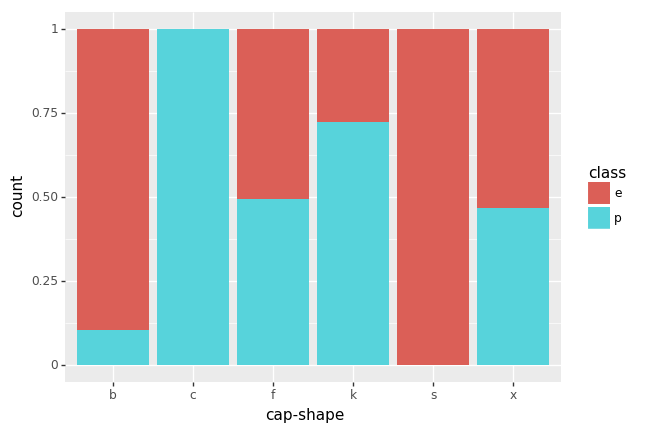

<ggplot: (-9223363275905097170)>

In [122]:
(ggplot(pd.concat([Mmm1, Mmm2]), aes(x='cap-shape', y='count', fill='class'))
 + geom_col()
)

In [119]:
df1 = pd.DataFrame({'count' : df.groupby( [ "class", "cap-shape"] ).size()}).reset_index()

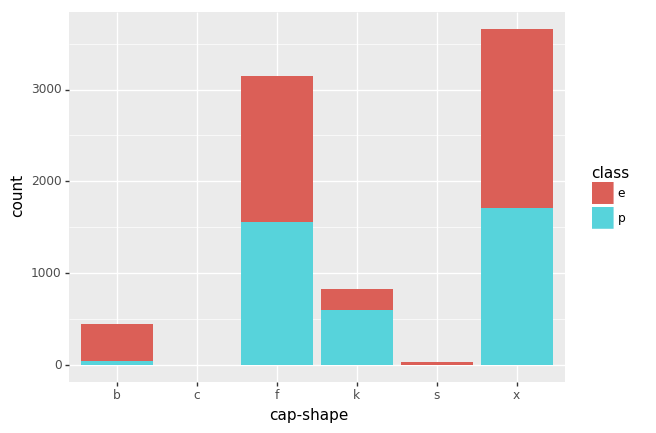

<ggplot: (-9223363275905736290)>

In [91]:
(ggplot(df1, aes(x='cap-shape', y='count', fill='class'))
 + geom_col()
)

# 귀찮으니까 함수 만들어서 포문을 돌립시다 ~~포문은 우리의 적~~

In [180]:
def BplotforMR(z):
    print(z, '\n')
    test_1 = pd.crosstab(index=df[z], columns=df["class"])
    print(test_1)
    y = pd.DataFrame(df.groupby(z)["class"].count())
    print(y)
    hmm = pd.DataFrame(test_1.values / y.values, columns = ["e", "p"], index = test_1.index)
    print(hmm)
    Mmm1 = pd.DataFrame({'value': test_1.index, 'ratio' : hmm.e, 'class': 'e'}).reset_index()
    Mmm2 = pd.DataFrame({'value': test_1.index, 'ratio' : hmm.p, 'class': 'p'}).reset_index()
    
    print((ggplot(pd.concat([Mmm1, Mmm2]), aes(x=z, y='ratio', fill='class'))
     + geom_col()
    ))
    
    df1 = pd.DataFrame({'count' : df.groupby( [ "class", z] ).size()}).reset_index()
    print((ggplot(df1, aes(x=z, y='count', fill='class'))
     + geom_col()
    ), '\n\n')

cap-shape 

class         e     p
cap-shape            
b           404    48
c             0     4
f          1596  1556
k           228   600
s            32     0
x          1948  1708
           class
cap-shape       
b            452
c              4
f           3152
k            828
s             32
x           3656
                  e         p
cap-shape                    
b          0.893805  0.106195
c          0.000000  1.000000
f          0.506345  0.493655
k          0.275362  0.724638
s          1.000000  0.000000
x          0.532823  0.467177


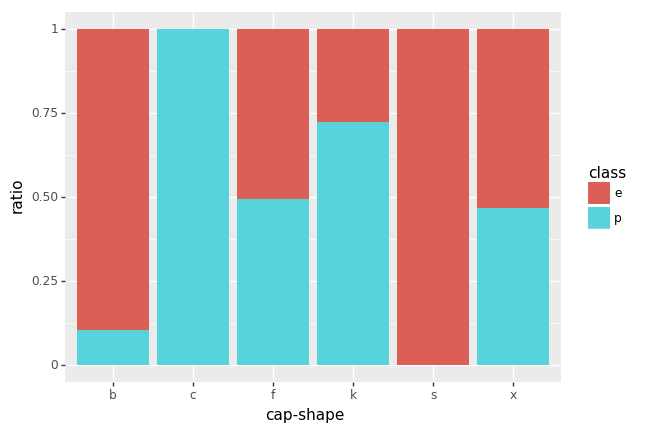

<ggplot: (8760948891912)>


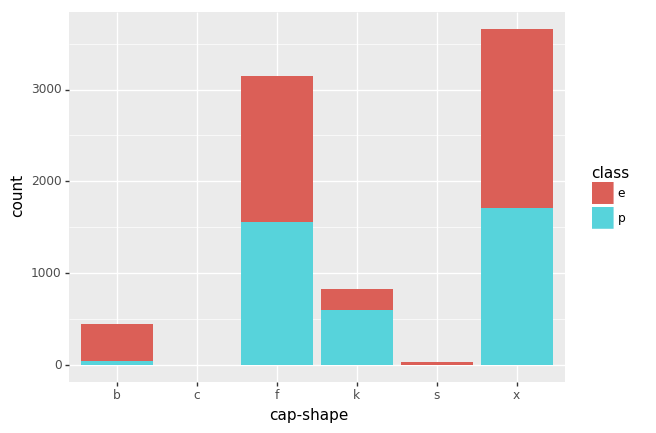

<ggplot: (-9223363275905834871)> 


cap-surface 

class           e     p
cap-surface            
f            1560   760
g               0     4
s            1144  1412
y            1504  1740
             class
cap-surface       
f             2320
g                4
s             2556
y             3244
                    e         p
cap-surface                    
f            0.672414  0.327586
g            0.000000  1.000000
s            0.447574  0.552426
y            0.463625  0.536375


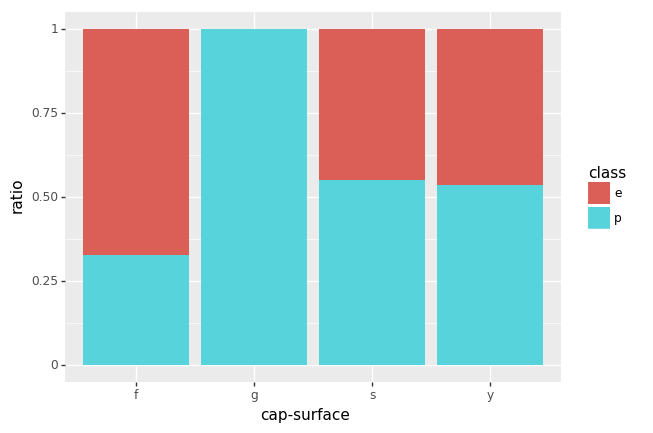

<ggplot: (-9223363275905204171)>


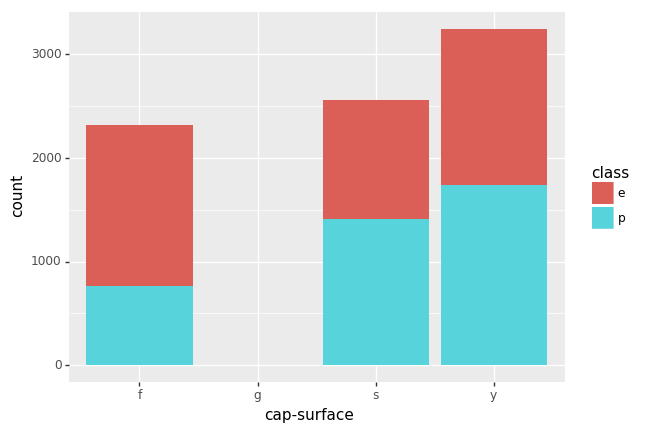

<ggplot: (8760949570487)> 


cap-color 

class         e     p
cap-color            
b            48   120
c            32    12
e           624   876
g          1032   808
n          1264  1020
p            56    88
r            16     0
u            16     0
w           720   320
y           400   672
           class
cap-color       
b            168
c             44
e           1500
g           1840
n           2284
p            144
r             16
u             16
w           1040
y           1072
                  e         p
cap-color                    
b          0.285714  0.714286
c          0.727273  0.272727
e          0.416000  0.584000
g          0.560870  0.439130
n          0.553415  0.446585
p          0.388889  0.611111
r          1.000000  0.000000
u          1.000000  0.000000
w          0.692308  0.307692
y          0.373134  0.626866


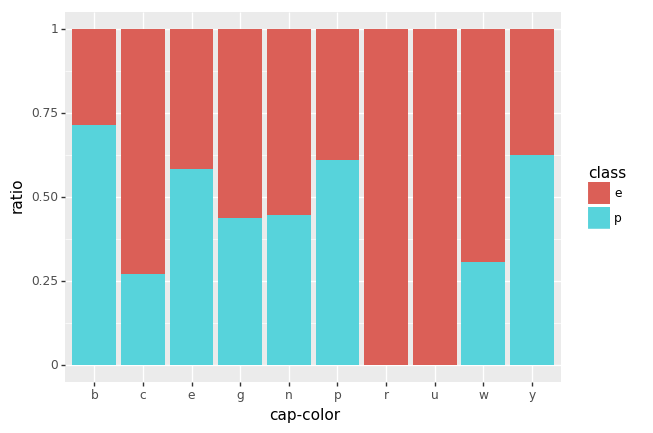

<ggplot: (-9223363275905111506)>


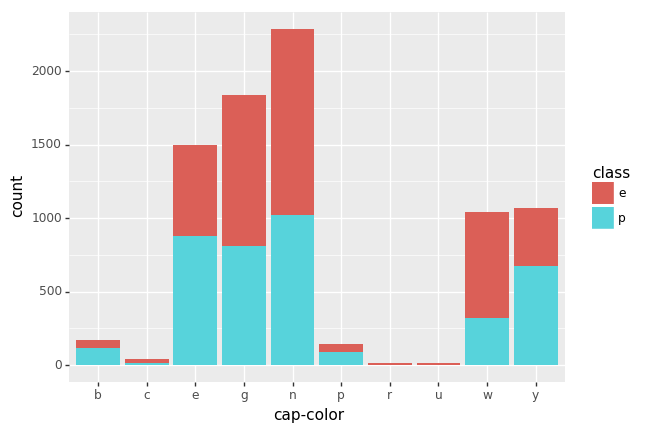

<ggplot: (8760949686883)> 


bruises 

class       e     p
bruises            
f        1456  3292
t        2752   624
         class
bruises       
f         4748
t         3376
                e         p
bruises                    
f        0.306655  0.693345
t        0.815166  0.184834


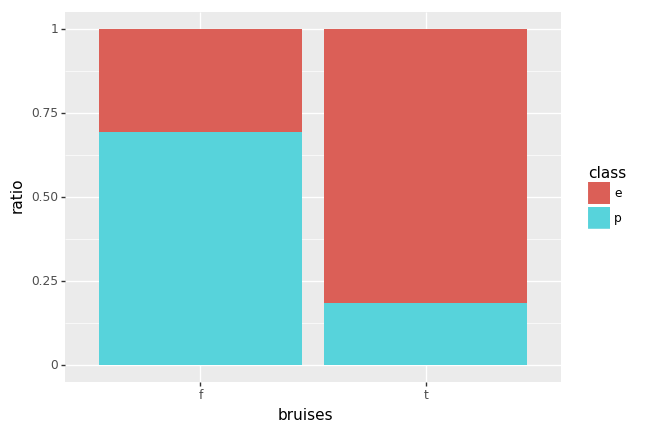

<ggplot: (-9223363275905103914)>


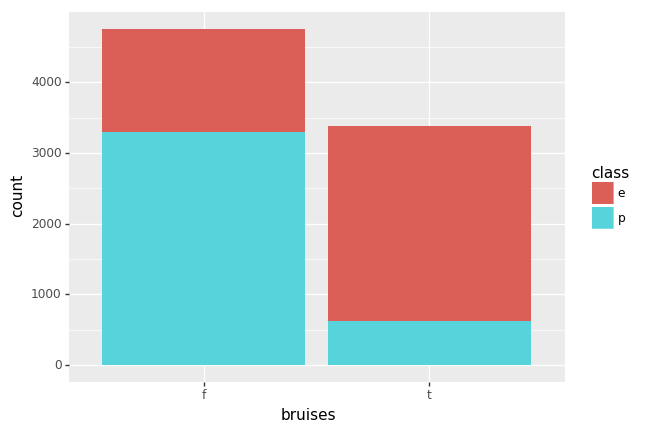

<ggplot: (8760949577413)> 


odor 

class     e     p
odor             
a       400     0
c         0   192
f         0  2160
l       400     0
m         0    36
n      3408   120
p         0   256
s         0   576
y         0   576
      class
odor       
a       400
c       192
f      2160
l       400
m        36
n      3528
p       256
s       576
y       576
             e         p
odor                    
a     1.000000  0.000000
c     0.000000  1.000000
f     0.000000  1.000000
l     1.000000  0.000000
m     0.000000  1.000000
n     0.965986  0.034014
p     0.000000  1.000000
s     0.000000  1.000000
y     0.000000  1.000000


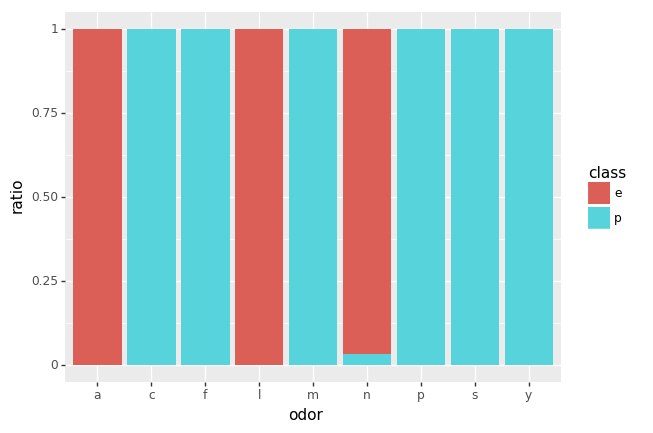

<ggplot: (8760949006179)>


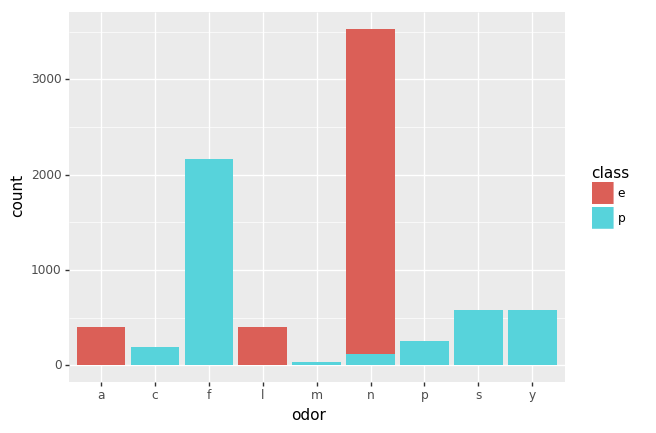

<ggplot: (-9223363275905833805)> 


gill-attachment 

class               e     p
gill-attachment            
a                 192    18
f                4016  3898
                 class
gill-attachment       
a                  210
f                 7914
                        e         p
gill-attachment                    
a                0.914286  0.085714
f                0.507455  0.492545


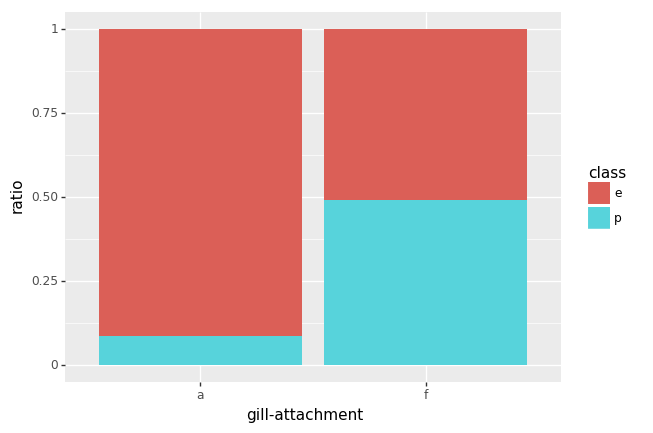

<ggplot: (-9223363275905114301)>


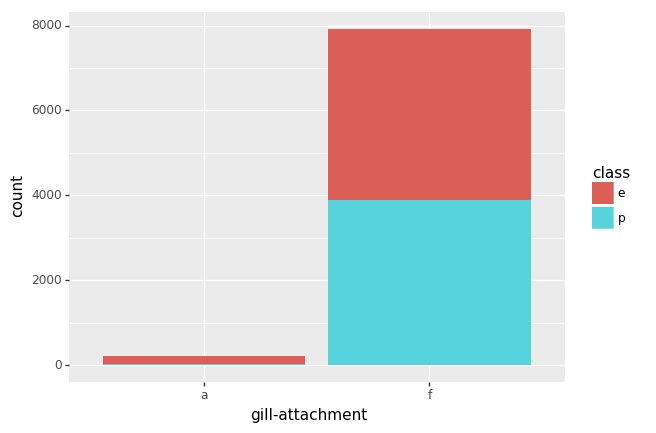

<ggplot: (8760949563645)> 


gill-spacing 

class            e     p
gill-spacing            
c             3008  3804
w             1200   112
              class
gill-spacing       
c              6812
w              1312
                     e         p
gill-spacing                    
c             0.441574  0.558426
w             0.914634  0.085366


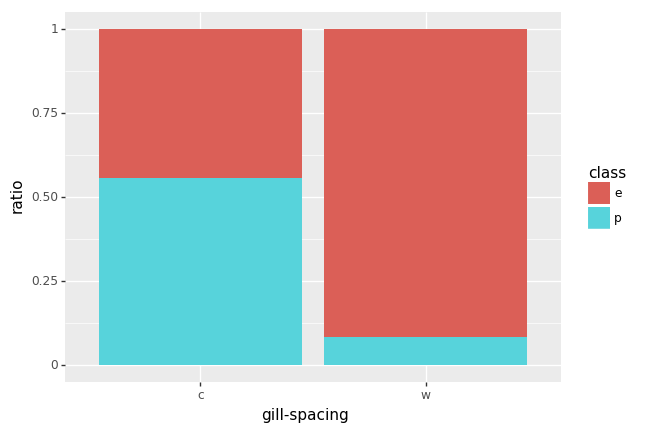

<ggplot: (8760949456069)>


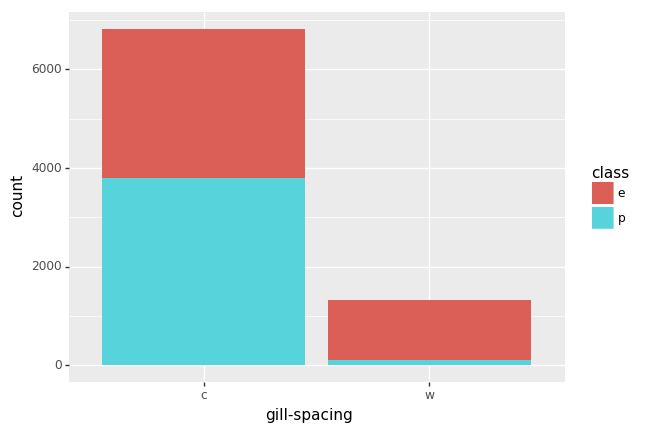

<ggplot: (-9223363275905252152)> 


gill-size 

class         e     p
gill-size            
b          3920  1692
n           288  2224
           class
gill-size       
b           5612
n           2512
                  e         p
gill-size                    
b          0.698503  0.301497
n          0.114650  0.885350


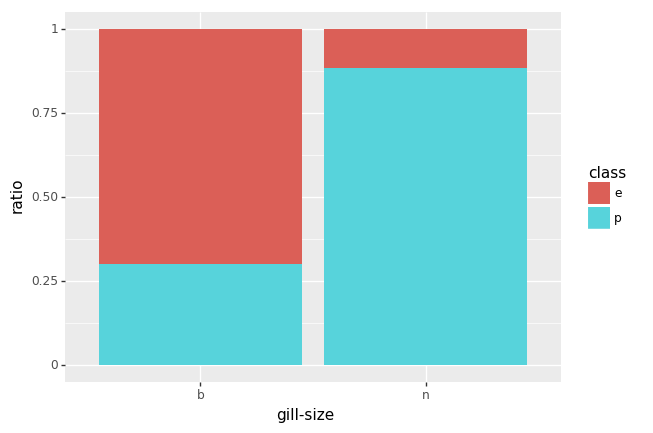

<ggplot: (-9223363275905319855)>


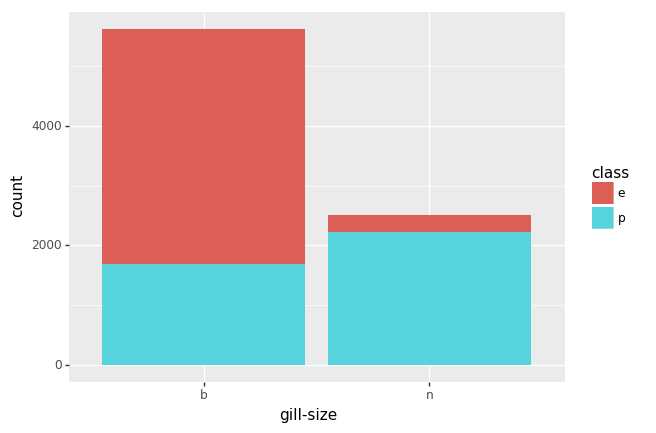

<ggplot: (8760948856605)> 


gill-color 

class         e     p
gill-color           
b             0  1728
e            96     0
g           248   504
h           204   528
k           344    64
n           936   112
o            64     0
p           852   640
r             0    24
u           444    48
w           956   246
y            64    22
            class
gill-color       
b            1728
e              96
g             752
h             732
k             408
n            1048
o              64
p            1492
r              24
u             492
w            1202
y              86
                   e         p
gill-color                    
b           0.000000  1.000000
e           1.000000  0.000000
g           0.329787  0.670213
h           0.278689  0.721311
k           0.843137  0.156863
n           0.893130  0.106870
o           1.000000  0.000000
p           0.571046  0.428954
r           0.000000  1.000000
u           0.902439  0.097561
w           0.795341  0.20

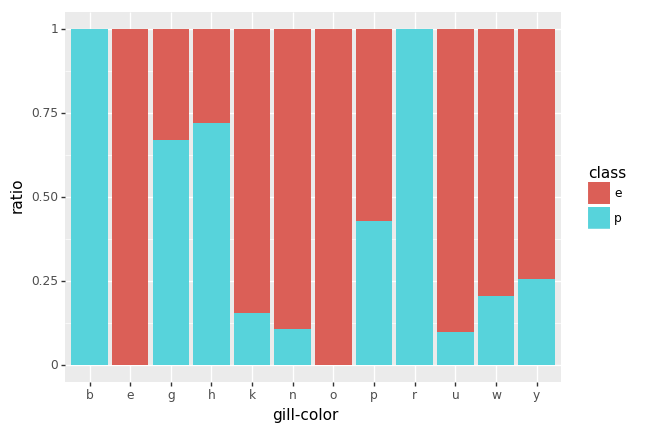

<ggplot: (-9223363275905805347)>


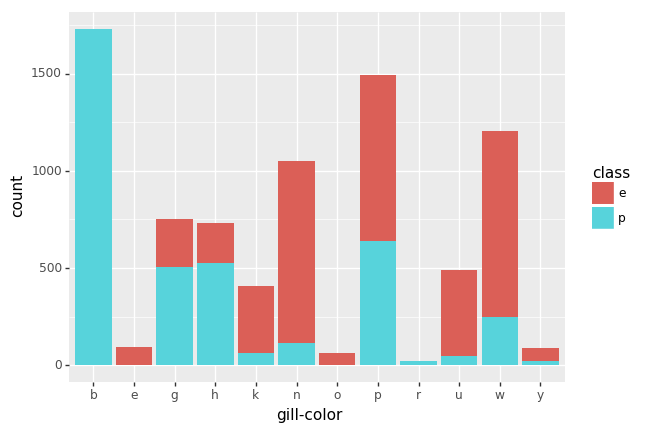

<ggplot: (8760948870092)> 


stalk-shape 

class           e     p
stalk-shape            
e            1616  1900
t            2592  2016
             class
stalk-shape       
e             3516
t             4608
                    e         p
stalk-shape                    
e            0.459613  0.540387
t            0.562500  0.437500


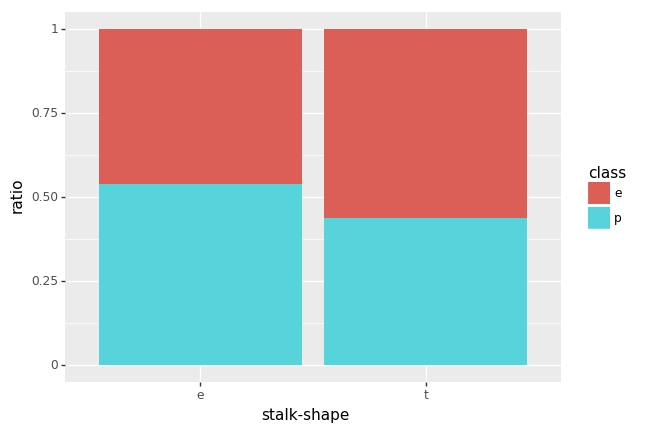

<ggplot: (8760949486193)>


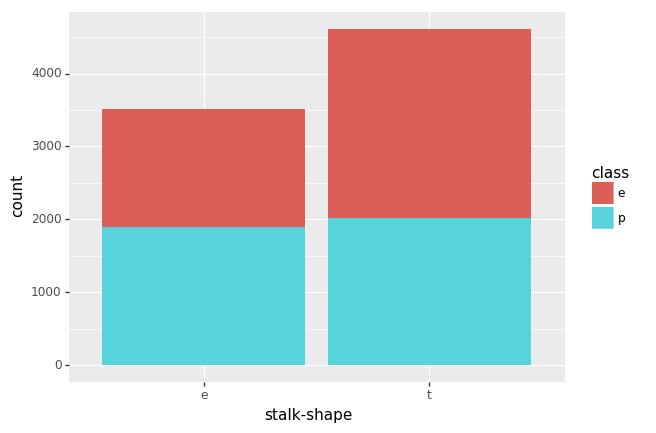

<ggplot: (-9223363275905252320)> 


stalk-root 

class          e     p
stalk-root            
?            720  1760
b           1920  1856
c            512    44
e            864   256
r            192     0
            class
stalk-root       
?            2480
b            3776
c             556
e            1120
r             192
                   e         p
stalk-root                    
?           0.290323  0.709677
b           0.508475  0.491525
c           0.920863  0.079137
e           0.771429  0.228571
r           1.000000  0.000000


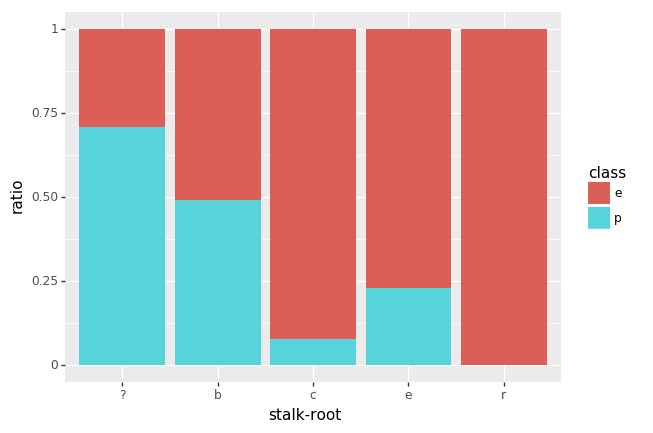

<ggplot: (-9223363275905239962)>


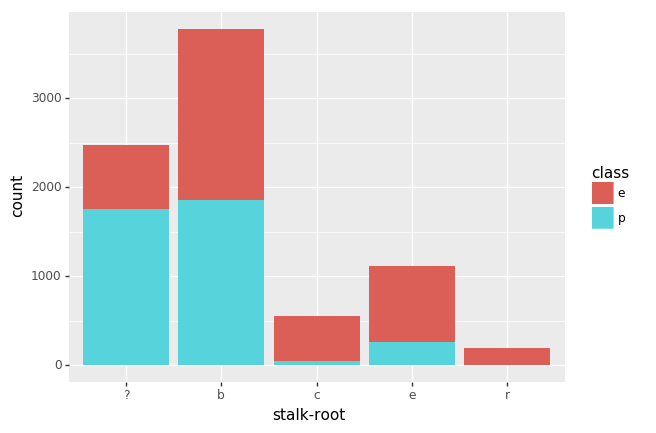

<ggplot: (8760963807664)> 


stalk-surface-above-ring 

class                        e     p
stalk-surface-above-ring            
f                          408   144
k                          144  2228
s                         3640  1536
y                           16     8
                          class
stalk-surface-above-ring       
f                           552
k                          2372
s                          5176
y                            24
                                 e         p
stalk-surface-above-ring                    
f                         0.739130  0.260870
k                         0.060708  0.939292
s                         0.703246  0.296754
y                         0.666667  0.333333


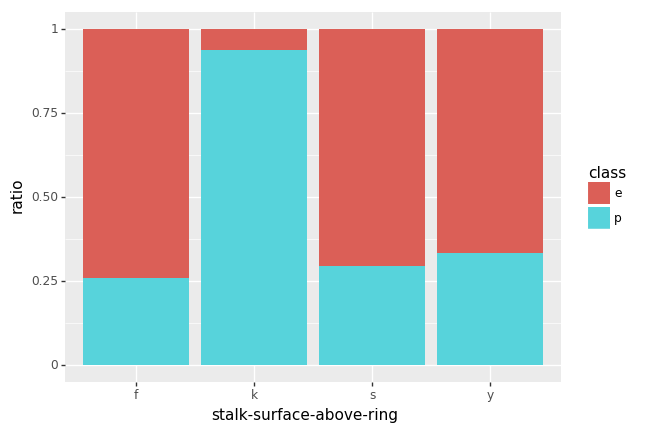

<ggplot: (8760949629374)>


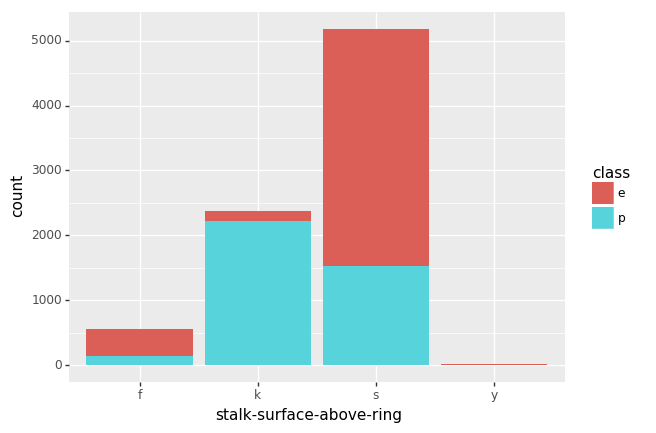

<ggplot: (-9223363275905306301)> 


stalk-surface-below-ring 

class                        e     p
stalk-surface-below-ring            
f                          456   144
k                          144  2160
s                         3400  1536
y                          208    76
                          class
stalk-surface-below-ring       
f                           600
k                          2304
s                          4936
y                           284
                                 e         p
stalk-surface-below-ring                    
f                         0.760000  0.240000
k                         0.062500  0.937500
s                         0.688817  0.311183
y                         0.732394  0.267606


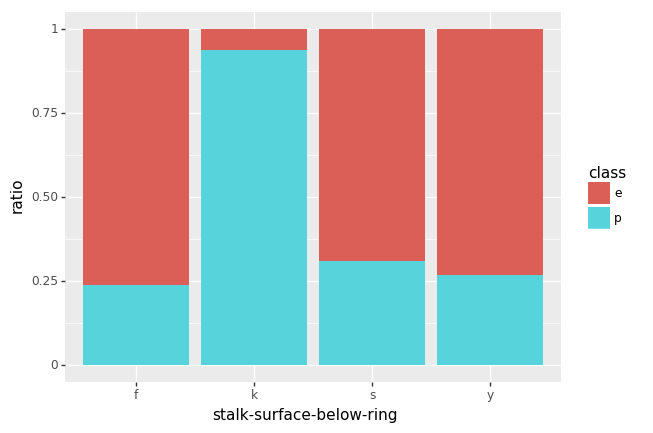

<ggplot: (-9223363275905294781)>


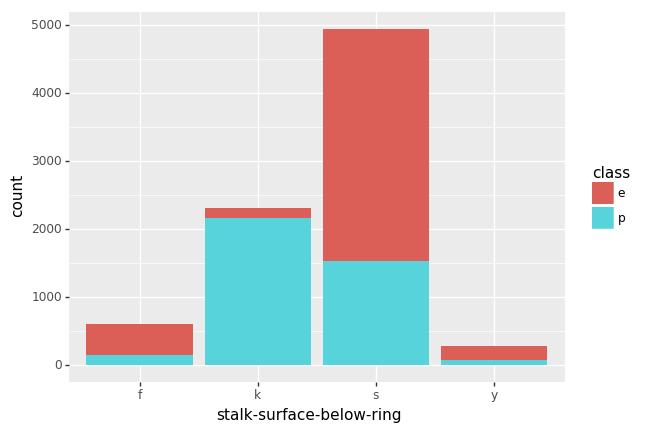

<ggplot: (-9223363275905106204)> 


stalk-color-above-ring 

class                      e     p
stalk-color-above-ring            
b                          0   432
c                          0    36
e                         96     0
g                        576     0
n                         16   432
o                        192     0
p                        576  1296
w                       2752  1712
y                          0     8
                        class
stalk-color-above-ring       
b                         432
c                          36
e                          96
g                         576
n                         448
o                         192
p                        1872
w                        4464
y                           8
                               e         p
stalk-color-above-ring                    
b                       0.000000  1.000000
c                       0.000000  1.000000
e                       1.000000  0.000000
g        

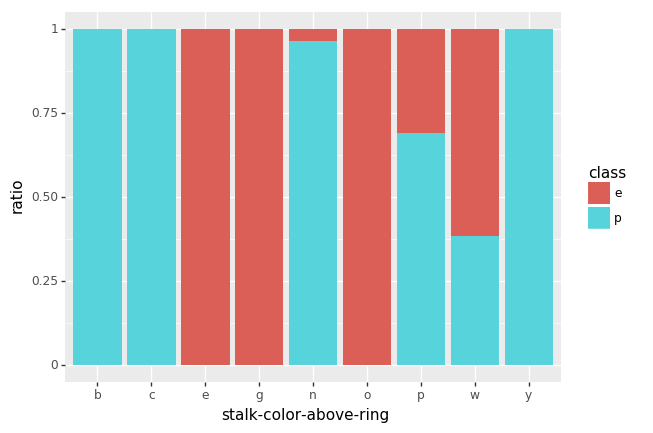

<ggplot: (8760948828189)>


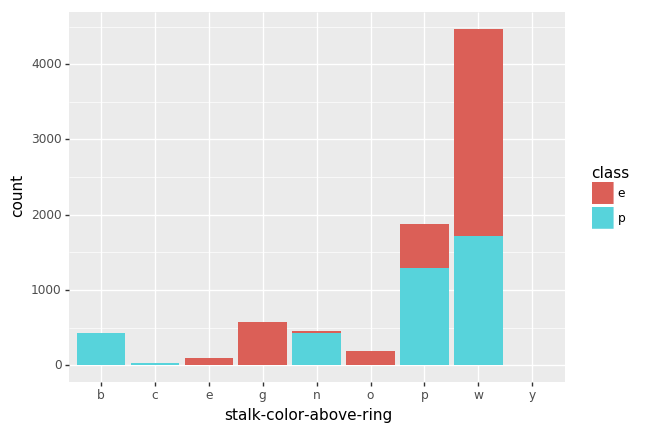

<ggplot: (-9223363275905197017)> 


stalk-color-below-ring 

class                      e     p
stalk-color-below-ring            
b                          0   432
c                          0    36
e                         96     0
g                        576     0
n                         64   448
o                        192     0
p                        576  1296
w                       2704  1680
y                          0    24
                        class
stalk-color-below-ring       
b                         432
c                          36
e                          96
g                         576
n                         512
o                         192
p                        1872
w                        4384
y                          24
                               e         p
stalk-color-below-ring                    
b                       0.000000  1.000000
c                       0.000000  1.000000
e                       1.000000  0.000000
g        

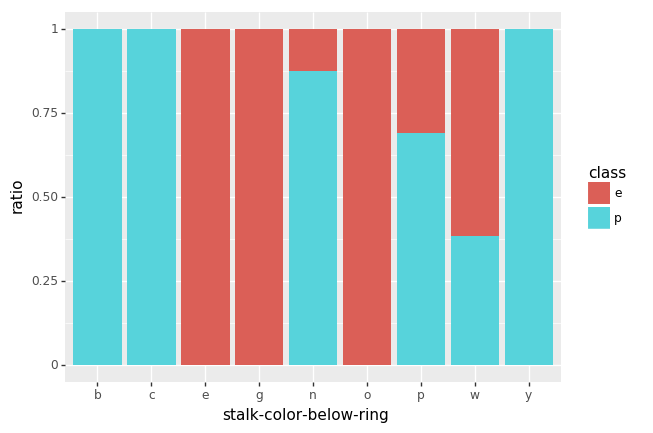

<ggplot: (8760949470819)>


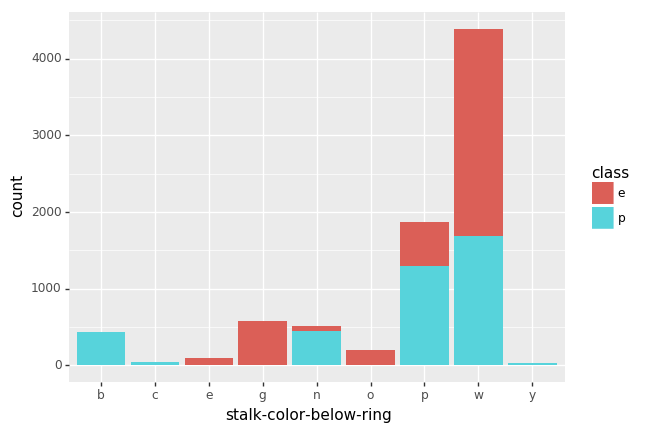

<ggplot: (8760949370814)> 


veil-type 

class         e     p
veil-type            
p          4208  3916
           class
veil-type       
p           8124
                  e         p
veil-type                    
p          0.517971  0.482029


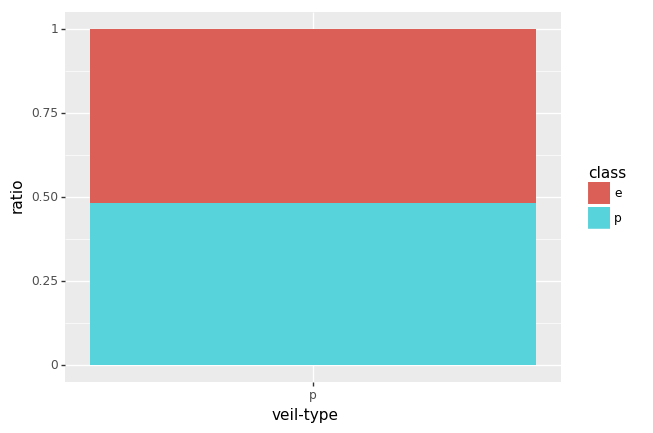

<ggplot: (8760949684530)>


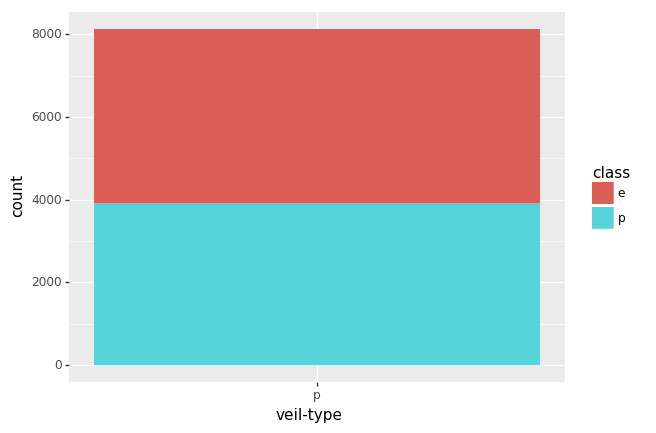

<ggplot: (-9223363275905759691)> 


veil-color 

class          e     p
veil-color            
n             96     0
o             96     0
w           4016  3908
y              0     8
            class
veil-color       
n              96
o              96
w            7924
y               8
                   e         p
veil-color                    
n           1.000000  0.000000
o           1.000000  0.000000
w           0.506815  0.493185
y           0.000000  1.000000


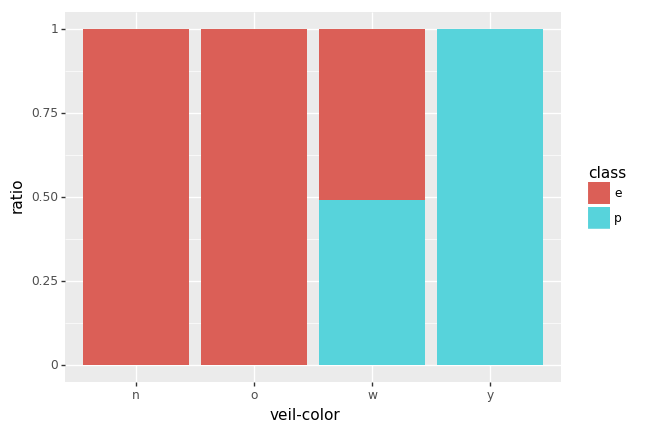

<ggplot: (-9223363275905285134)>


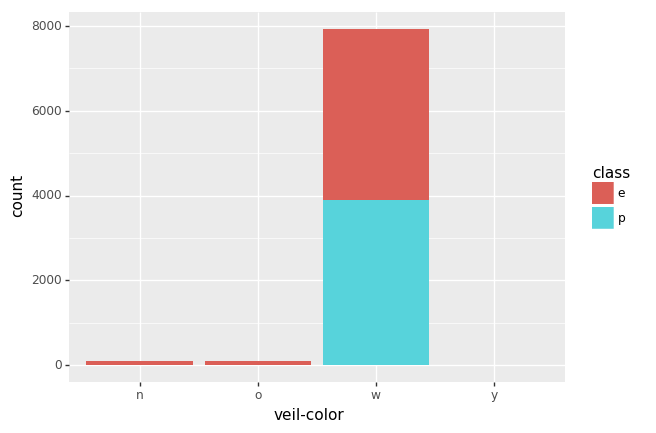

<ggplot: (-9223363275906025009)> 


ring-number 

class           e     p
ring-number            
n               0    36
o            3680  3808
t             528    72
             class
ring-number       
n               36
o             7488
t              600
                    e         p
ring-number                    
n            0.000000  1.000000
o            0.491453  0.508547
t            0.880000  0.120000


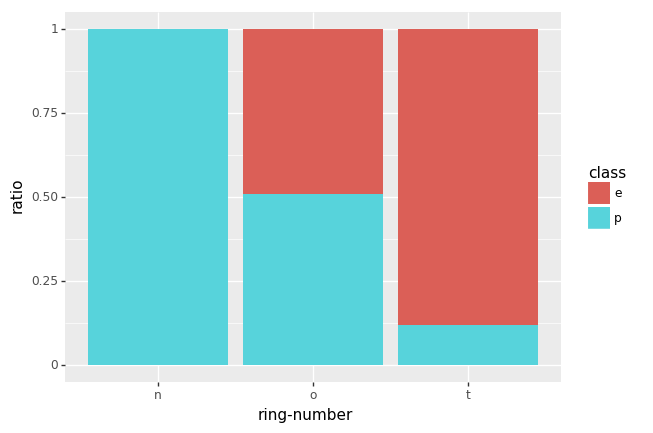

<ggplot: (-9223363275905412650)>


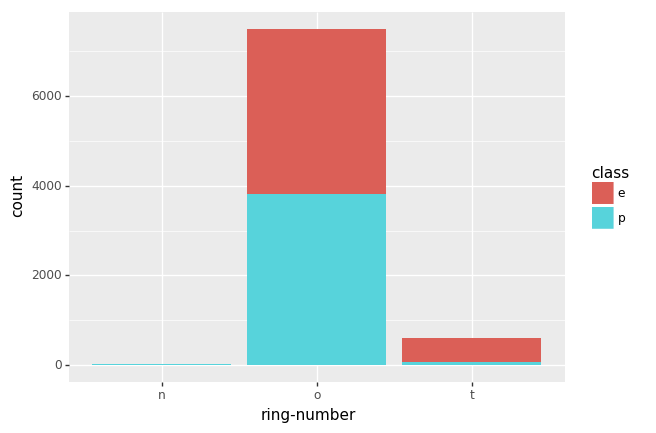

<ggplot: (-9223363275833595388)> 


ring-type 

class         e     p
ring-type            
e          1008  1768
f            48     0
l             0  1296
n             0    36
p          3152   816
           class
ring-type       
e           2776
f             48
l           1296
n             36
p           3968
                  e         p
ring-type                    
e          0.363112  0.636888
f          1.000000  0.000000
l          0.000000  1.000000
n          0.000000  1.000000
p          0.794355  0.205645


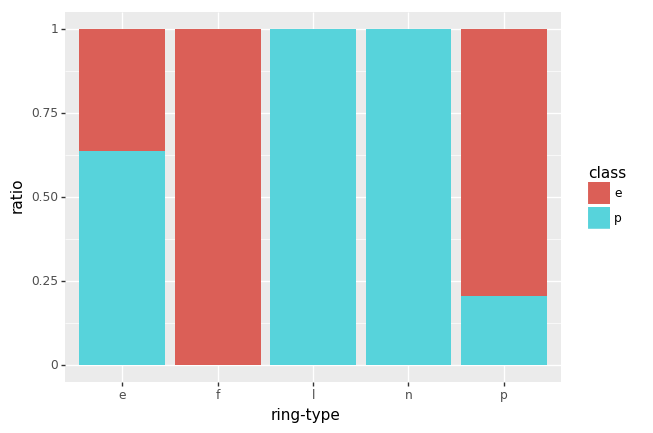

<ggplot: (-9223363275905412825)>


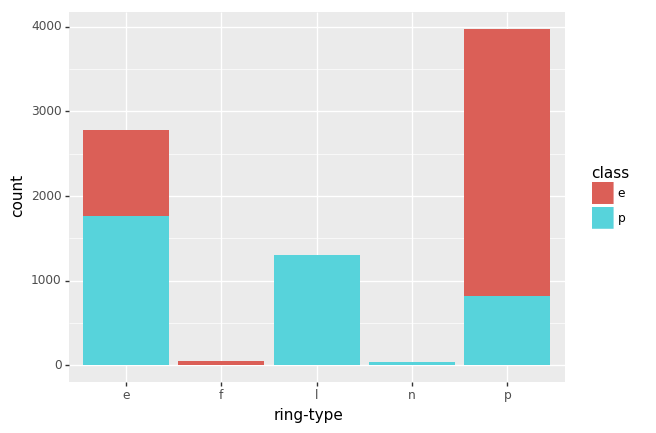

<ggplot: (-9223363275905196961)> 


spore-print-color 

class                 e     p
spore-print-color            
b                    48     0
h                    48  1584
k                  1648   224
n                  1744   224
o                    48     0
r                     0    72
u                    48     0
w                   576  1812
y                    48     0
                   class
spore-print-color       
b                     48
h                   1632
k                   1872
n                   1968
o                     48
r                     72
u                     48
w                   2388
y                     48
                          e         p
spore-print-color                    
b                  1.000000  0.000000
h                  0.029412  0.970588
k                  0.880342  0.119658
n                  0.886179  0.113821
o                  1.000000  0.000000
r                  0.000000  1.000000
u                  1.000000  0.0000

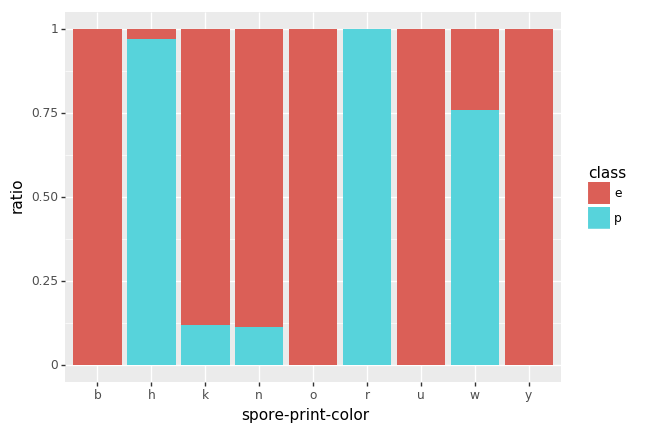

<ggplot: (8760949530411)>


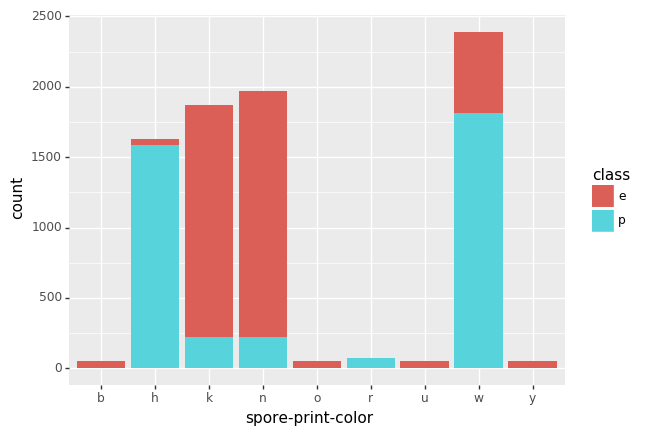

<ggplot: (-9223363275905228014)> 


population 

class          e     p
population            
a            384     0
c            288    52
n            400     0
s            880   368
v           1192  2848
y           1064   648
            class
population       
a             384
c             340
n             400
s            1248
v            4040
y            1712
                   e         p
population                    
a           1.000000  0.000000
c           0.847059  0.152941
n           1.000000  0.000000
s           0.705128  0.294872
v           0.295050  0.704950
y           0.621495  0.378505


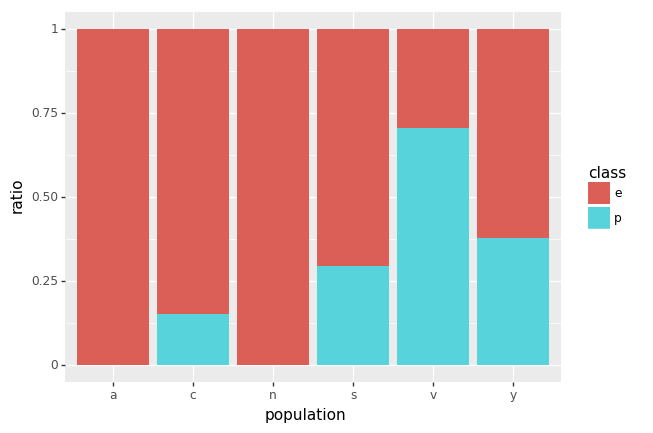

<ggplot: (-9223363275833595248)>


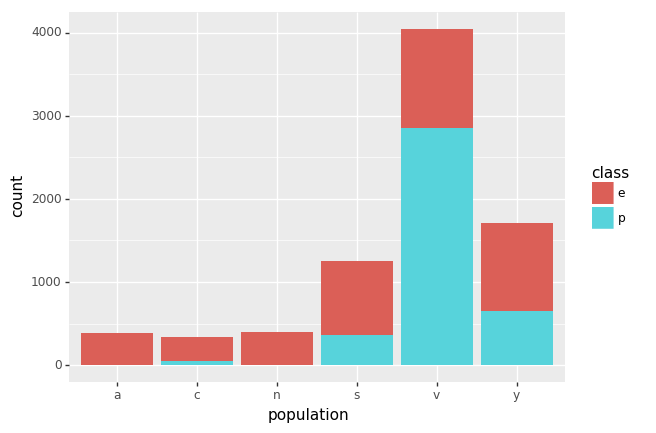

<ggplot: (8760949365715)> 


habitat 

class       e     p
habitat            
d        1880  1268
g        1408   740
l         240   592
m         256    36
p         136  1008
u          96   272
w         192     0
         class
habitat       
d         3148
g         2148
l          832
m          292
p         1144
u          368
w          192
                e         p
habitat                    
d        0.597205  0.402795
g        0.655493  0.344507
l        0.288462  0.711538
m        0.876712  0.123288
p        0.118881  0.881119
u        0.260870  0.739130
w        1.000000  0.000000


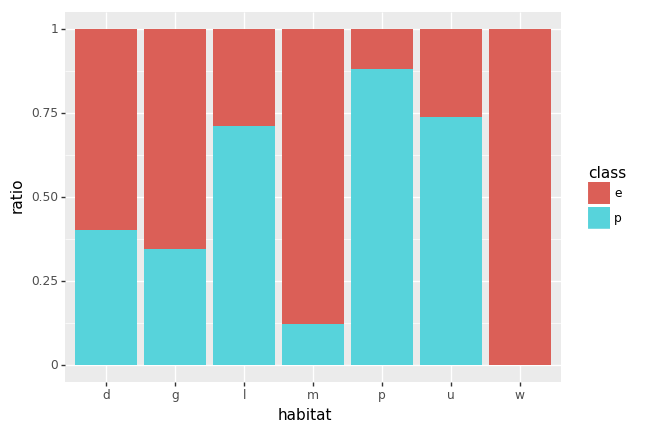

<ggplot: (8760949542576)>


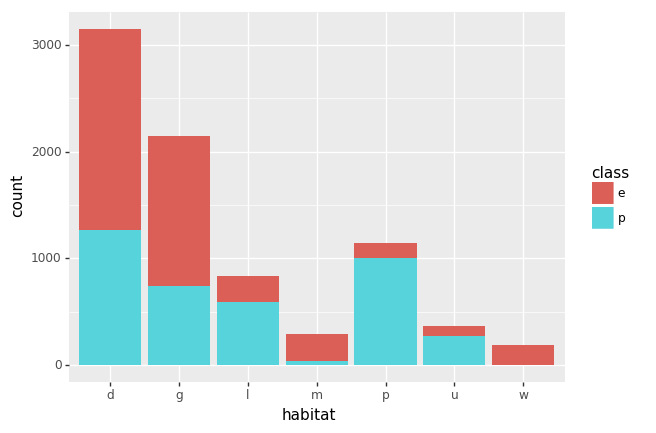

<ggplot: (8761021185684)> 




In [181]:
for i in range(len(df.columns[1:])):
    BplotforMR(df.columns[1:][i])

# clustering

In [19]:
from kmodes.kmodes import KModes

In [20]:
km = KModes(n_clusters=4, n_init=5)
km.fit(MSR_X)

KModes(cat_dissim=<function matching_dissim at 0x7f350f0ee620>, init='Cao',
    max_iter=100, n_clusters=4, n_init=1, n_jobs=1, random_state=None,
    verbose=0)

In [21]:
print(km.cluster_centroids_)

[[ 5  3  4  1  5  1  0  0 10  1  1  2  2  7  7  0  2  1  4  3  4]
 [ 2  3  4  0  2  1  0  1  0  1  0  1  2  7  7  0  2  1  0  7  4]
 [ 5  0  3  0  5  1  1  0  7  1  3  2  2  7  7  0  2  1  0  2  3]
 [ 5  3  3  0  2  1  0  0  2  0  1  1  1  4  4  0  2  1  2  1  5]]


In [23]:
clusters = km.fit_predict(MSR_X)
clusters

array([0, 0, 0, ..., 0, 1, 0], dtype=uint16)

In [34]:
Label=pd.DataFrame(km.labels_,columns=['label'])
mushrooms=pd.concat([mushroom,Label],axis=1)
mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,label
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,0
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,0
2,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,0
3,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,0
4,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,2
5,e,x,y,y,t,a,f,c,b,n,...,w,w,p,w,o,p,k,n,g,0
6,e,b,s,w,t,a,f,c,b,g,...,w,w,p,w,o,p,k,n,m,0
7,e,b,y,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,s,m,0
8,p,x,y,w,t,p,f,c,n,p,...,w,w,p,w,o,p,k,v,g,0
9,e,b,s,y,t,a,f,c,b,g,...,w,w,p,w,o,p,k,s,m,0


In [36]:
y = list(map(lambda x:1 if x=='p' else 0,mushrooms['class']))

In [37]:
cls_df = pd.DataFrame({"label":y, "cls":clusters})

In [38]:
cls_df.groupby(['cls']).mean()

,label
cls,
0,0.193848
1,0.971678
2,0.071730
3,0.987988


In [41]:
#독버섯의 특징: flat한 cap-shape, spicy한 odor, narrow한 gill-size, silky한 stalk-surface-below-ring..

# ~~상관분석도 가능하대요!~~

In [226]:
import scipy.stats as ss
import itertools
from collections import Counter


In [224]:
def conditional_entropy(x, y):
    """Calculates the conditional entropy of x given y: S(x|y)

    Parameters
    ----------
    x,y : array-like, int-encoded categorical value arrays
    
    Returns
    -------
    entropy : float
    
    See Also
    --------
    Wikipedia: https://en.wikipedia.org/wiki/Conditional_entropy
    
    """
    y=y.astype(np.int64)
    y_counter = np.bincount(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = y_counter.sum()
    entropy = 0.0
    for k,v in xy_counter.items():
        p_xy = v / total_occurrences
        p_y = y_counter[k[1]] / total_occurrences
        entropy += p_xy * np.log(p_y/p_xy)
    return entropy

def cramers_v(x, y):
    """
    Calculates Cramer's V statistic for categorical-categorical association.
    Uses correction from Bergsma and Wicher, Journal of the Korean Statistical Society 42 (2013): 323-328.
    This is a symmetric coefficient: V(x,y) = V(y,x)

    Parameters
    ----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
        
    Returns 
    -------
    float, between range [0,1]
    
    See Also
    --------
    Original function from: https://stackoverflow.com/a/46498792/5863503
    Wikipedia: https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V
    """
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
    
def theils_u(x, y):
    """Calculates Theil's U statistic (Uncertainty coefficient) for categorical-categorical association.
   
    This is the uncertainty of x given y: value is on the range of [0,1] 
    - where 0 means y provides no information about x, 
    and 1 means y provides full information about x.
    This is an asymmetric coefficient: U(x,y) != U(y,x)
    
    Parameters
    ----------
    x,y : array-like, int-encoded categorical value arrays
    
    Returns
    -------
    uncertainity coefficent : float between [0,1]
    
    See Also
    --------
    Wikipedia: https://en.wikipedia.org/wiki/Uncertainty_coefficient
    """
    x=x.astype(np.int64)
    s_xy = conditional_entropy(x,y)
    x_counter = np.bincount(x)
    total_occurrences = x_counter.sum()
    p_x = x_counter/total_occurrences
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    return (s_x - s_xy) / s_x

def catcorr(data, method='theils'):
    """ Compute categorical correlations using uncertainty coefficients (Theil's U) or Cramer's V
    
    Parameters
    ----------
    data : pandas.DataFrame 
        dataset used to compute correlations 
    method - str, ['theils' | 'cramers']
        method to calculate correlations, cramers is symmetric, theils is asymmetric
    
    Returns
    -------
        computed correlations : pandas.DataFrame
    """
    if method == 'cramers':
        return data.corr(method=cramers_v)
    elif method != 'theils':
        raise NotImplementedError(f"method: '{method}' not implemented, choose either 'cramers' or 'theils'")
    cols = data.columns
    clen = cols.size
    
    pairings = list(itertools.product(data.columns, repeat=2))
    theils_mat = np.reshape([theils_u(data[p[1]],data[p[0]]) for p in pairings],(clen,clen))
    return pd.DataFrame(theils_mat, index=cols, columns=cols)

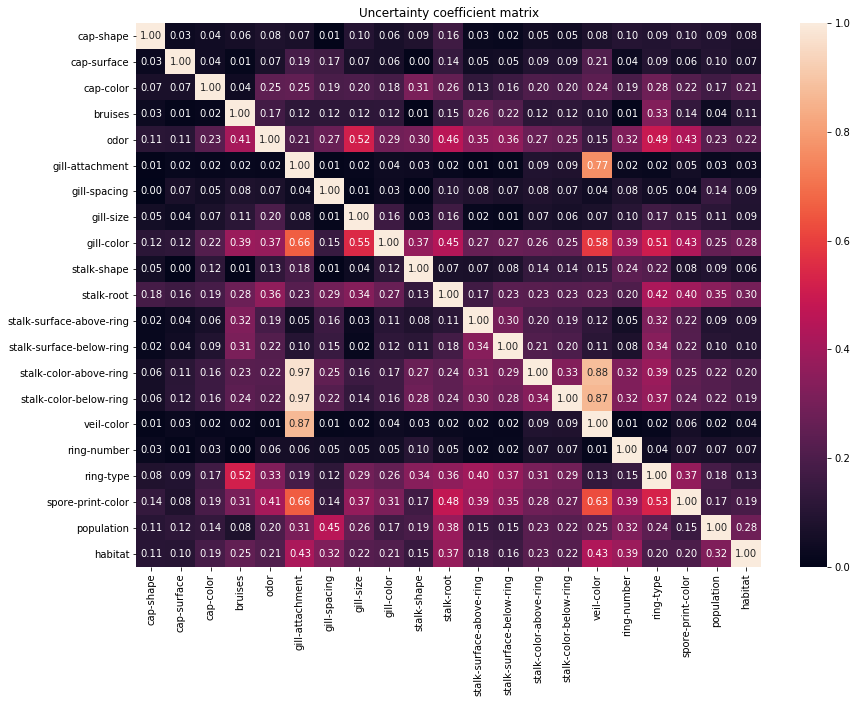

In [228]:
fig, ax = plt.subplots(1,1, figsize=(14,10))
sns.heatmap(catcorr(mushrooms.drop('veil-type', axis=1)),0,1,ax=ax,annot=True,fmt="0.2f").set_title("Uncertainty coefficient matrix")
plt.show()

# ~~MCA 라는게 있어요!~~

# 모델링 시작!

## 모델링을 위한 전처리, 더미화

In [127]:
MSR_X=pd.get_dummies(MSR_X,columns=MSR_X.columns,drop_first=True)

In [18]:
data = df.copy()

In [19]:
data_dummy = pd.get_dummies(data, drop_first=True)
data_dummy.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [80]:
dt_drop = data_dummy.drop(["gill-spacing_w", "stalk-shape_t"], axis=1)
dt_drop.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [81]:
feature_list = list(dt_drop.columns)
feature_list


['class_p',
 'cap-shape_c',
 'cap-shape_f',
 'cap-shape_k',
 'cap-shape_s',
 'cap-shape_x',
 'cap-surface_g',
 'cap-surface_s',
 'cap-surface_y',
 'cap-color_c',
 'cap-color_e',
 'cap-color_g',
 'cap-color_n',
 'cap-color_p',
 'cap-color_r',
 'cap-color_u',
 'cap-color_w',
 'cap-color_y',
 'bruises_t',
 'odor_c',
 'odor_f',
 'odor_l',
 'odor_m',
 'odor_n',
 'odor_p',
 'odor_s',
 'odor_y',
 'gill-attachment_f',
 'gill-size_n',
 'gill-color_e',
 'gill-color_g',
 'gill-color_h',
 'gill-color_k',
 'gill-color_n',
 'gill-color_o',
 'gill-color_p',
 'gill-color_r',
 'gill-color_u',
 'gill-color_w',
 'gill-color_y',
 'stalk-root_b',
 'stalk-root_c',
 'stalk-root_e',
 'stalk-root_r',
 'stalk-surface-above-ring_k',
 'stalk-surface-above-ring_s',
 'stalk-surface-above-ring_y',
 'stalk-surface-below-ring_k',
 'stalk-surface-below-ring_s',
 'stalk-surface-below-ring_y',
 'stalk-color-above-ring_c',
 'stalk-color-above-ring_e',
 'stalk-color-above-ring_g',
 'stalk-color-above-ring_n',
 'stalk-color

In [82]:
x_dt = dt_drop.iloc[:,1:94]

In [83]:
y_dt = dt_drop.iloc[:, 0:1]

## 모델링을 위한 모듈

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [25]:
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [20]:
import matplotlib

# Decision Tree

In [129]:
DT_1 = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [130]:
np.random.seed(0)
scoring = ['f1','precision','recall'] 
scores_1 = cross_validate(DT_1, MSR_X, MSR_Response, scoring=scoring, cv=5,return_train_score=False)

In [131]:
print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(scores_1['test_f1'])))

parameter가 tuning 되지 않았을 때의 F1 Score : 0.914


In [132]:
np.random.seed(0)
hyperparamters = {'max_depth':[2,3,4,5,6,7,8,9], 
                  'min_samples_split':[2,3,4,5,6,7]} #hyperparameter를 dict type으로 넣기
GridCV = GridSearchCV(estimator=DT_1, param_grid=hyperparamters, cv=5, verbose=1) 
GridCV.fit(MSR_X, MSR_Response)
GridCV.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    2.2s finished


{'max_depth': 6, 'min_samples_split': 2}

In [133]:
DT_2 = DecisionTreeClassifier(max_depth=6, min_samples_split=2,random_state=0)

In [134]:
np.random.seed(0)
scoring = ['f1','precision','recall'] 
scores_2 = cross_validate(DT_2, MSR_X, MSR_Response, scoring=scoring, cv=5, return_train_score = False)

In [135]:
print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(scores_1['test_f1'])))
print('parameter가 tuning 되었을 때의 F1 Score : {:.3f} '.format(np.mean(scores_2['test_f1'])))

parameter가 tuning 되지 않았을 때의 F1 Score : 0.914
parameter가 tuning 되었을 때의 F1 Score : 0.979 


# Baggin

In [136]:
from sklearn.ensemble import BaggingClassifier

In [137]:
Ens_1=BaggingClassifier(DT_1,oob_score=True,random_state=0)

In [138]:
np.random.seed(0)
scores_3=cross_validate(Ens_1,MSR_X, MSR_Response, scoring=scoring, cv=5,return_train_score=False)

/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:615: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:610: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:615: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:610: UserWarning: Some inputs do not

In [139]:
np.random.seed(0)
hyperparamters = {'n_estimators':[75, 80, 85, 90, 95], 
                  'max_samples':[0.5,0.6,0.7,0.8,0.9,1]} #hyperparameter를 dict type으로 넣기
GridCV = GridSearchCV(estimator=Ens_1, param_grid=hyperparamters, cv=10, verbose=1) 
GridCV.fit(MSR_X, MSR_Response)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  2.7min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
         ... n_estimators=10, n_jobs=None, oob_score=True,
         random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [75, 80, 85, 90, 95], 'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [140]:
GridCV.best_params_

{'max_samples': 0.7, 'n_estimators': 75}

In [141]:
Ens_2=BaggingClassifier(DT_1,max_samples=0.7,n_estimators=75,oob_score=True,random_state=0)

In [142]:
np.random.seed(0)
scores_4 = cross_validate(Ens_2,MSR_X, MSR_Response, scoring=scoring, cv=10,return_train_score=False)

In [143]:
print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(scores_1['test_f1'])))
print('parameter가 tuning 되었을 때의 F1 Score : {:.3f} '.format(np.mean(scores_2['test_f1'])))
print('Bagging 했을 때의 F1 Score : {:.3f}'.format(np.mean(scores_3['test_f1'])))
print("Bagging을 parameter tuning 했을 때의 F1 Score: {:.3f}".format(np.mean(scores_4['test_f1'])))

parameter가 tuning 되지 않았을 때의 F1 Score : 0.914
parameter가 tuning 되었을 때의 F1 Score : 0.979 
Bagging 했을 때의 F1 Score : 0.900
Bagging을 parameter tuning 했을 때의 F1 Score: 0.952


# Random Forest

In [144]:
from sklearn.ensemble import RandomForestClassifier

In [145]:
RF_1=RandomForestClassifier(random_state=0)

In [146]:
np.random.seed(0)
scores_5=cross_validate(RF_1,MSR_X, MSR_Response, scoring=scoring, cv=5,return_train_score=False)

/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/

In [147]:
print(np.mean(scores_5['test_f1']))

0.9385924444081544


In [148]:
np.random.seed(0)
hyperparamters = {'n_estimators':[35,45,55,65,75,85,95], 
                  'max_features':[1,2,3,4,5,6]} #hyperparameter를 dict type으로 넣기
GridCV = GridSearchCV(estimator=RF_1, param_grid=hyperparamters, cv=5, verbose=1) 
GridCV.fit(MSR_X, MSR_Response)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:   27.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [35, 45, 55, 65, 75, 85, 95], 'max_features': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [149]:
GridCV.best_params_

{'max_features': 2, 'n_estimators': 85}

In [152]:
np.random.seed(0)
hyperparamters = {'n_estimators':[75,85,95, 100], 
                  'max_features':[1,2,3,4,5,6]} #hyperparameter를 dict type으로 넣기
GridCV = GridSearchCV(estimator=RF_1, param_grid=hyperparamters, cv=10, verbose=1) 
GridCV.fit(MSR_X, MSR_Response)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   44.2s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [75, 85, 95, 100], 'max_features': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [153]:
GridCV.best_params_

{'max_features': 3, 'n_estimators': 100}

In [154]:
np.random.seed(0)
RF_2 = RandomForestClassifier(n_estimators=100, max_features=3,random_state=0)
scores_6 = cross_validate(RF_2, MSR_X, MSR_Response, scoring=scoring, cv=10, return_train_score = False)

In [155]:
print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(scores_1['test_f1'])))
print('parameter가 tuning 되었을 때의 F1 Score : {:.3f} '.format(np.mean(scores_2['test_f1'])))
print('Bagging 했을 때의 F1 Score : {:.3f}'.format(np.mean(scores_3['test_f1'])))
print("Bagging을 parameter tuning 했을 때의 F1 Score: {:.3f}".format(np.mean(scores_4['test_f1'])))
print("RandomForest를 했을 때의 F1 Score : {:.3f} ".format(np.mean(scores_5['test_f1'])))
print("RandomForest를 parameter tuning 했을 때의 F1 Score : {:.3f}".format(np.mean(scores_6['test_f1'])))

parameter가 tuning 되지 않았을 때의 F1 Score : 0.914
parameter가 tuning 되었을 때의 F1 Score : 0.979 
Bagging 했을 때의 F1 Score : 0.900
Bagging을 parameter tuning 했을 때의 F1 Score: 0.952
RandomForest를 했을 때의 F1 Score : 0.939 
RandomForest를 parameter tuning 했을 때의 F1 Score : 0.952


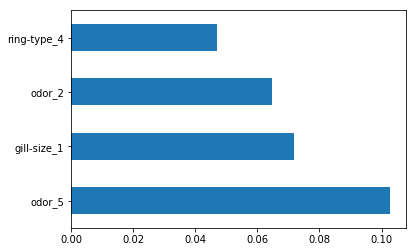

In [156]:
RF_5=RandomForestClassifier(n_estimators=100, max_features=3,random_state=0)
RF_5.fit(MSR_X,MSR_Response)
importances =RF_5.feature_importances_
indices = np.argsort(importances)
feat_importances = pd.Series(RF_5.feature_importances_, index=MSR_X.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()

## Logistic Regression 적용

In [157]:
from sklearn.linear_model import LogisticRegression

In [158]:
LG = LogisticRegression()
np.random.seed(0)
scores_7=cross_validate(LG, MSR_X, MSR_Response, scoring=scoring, cv=5,return_train_score=False)

/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

In [159]:
print("Logistic Regression를 했을 때의 F1 Score : {:.3f} ".format(np.mean(scores_7['test_f1'])))

Logistic Regression를 했을 때의 F1 Score : 0.903 


In [160]:
np.random.seed(0)
hyperparamters = {'penalty': ['l1','l2'], 
                  'C': np.logspace(-4, 4, 20)} #hyperparameter를 dict type으로 넣기
GridCV = GridSearchCV(estimator=LG, param_grid=hyperparamters, cv=5, verbose=1) 
GridCV.fit(MSR_X, MSR_Response)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logist

/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [161]:
GridCV.best_params_

{'C': 0.012742749857031334, 'penalty': 'l1'}

In [162]:
np.random.seed(0)
LG_2 = LogisticRegression(penalty = 'l1', C = 0.012742749857031334)
scores_8 = cross_validate(LG_2, MSR_X, MSR_Response, scoring=scoring, cv=5, return_train_score = False)

/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

In [163]:
print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(scores_1['test_f1'])))
print('parameter가 tuning 되었을 때의 F1 Score : {:.3f} '.format(np.mean(scores_2['test_f1'])))
print('Bagging 했을 때의 F1 Score : {:.3f}'.format(np.mean(scores_3['test_f1'])))
print("Bagging을 parameter tuning 했을 때의 F1 Score: {:.3f}".format(np.mean(scores_4['test_f1'])))
print("RandomForest를 했을 때의 F1 Score : {:.3f} ".format(np.mean(scores_5['test_f1'])))
print("RandomForest를 parameter tuning 했을 때의 F1 Score : {:.3f}".format(np.mean(scores_6['test_f1'])))
print("Logistic Regression 했을 때의 F1 Score : {:.3f} ".format(np.mean(scores_7['test_f1'])))
print("Logistic Regression parameter tuning 했을 때의 F1 Score : {:.3f}".format(np.mean(scores_8['test_f1'])))

parameter가 tuning 되지 않았을 때의 F1 Score : 0.914
parameter가 tuning 되었을 때의 F1 Score : 0.979 
Bagging 했을 때의 F1 Score : 0.900
Bagging을 parameter tuning 했을 때의 F1 Score: 0.952
RandomForest를 했을 때의 F1 Score : 0.939 
RandomForest를 parameter tuning 했을 때의 F1 Score : 0.952
Logistic Regression 했을 때의 F1 Score : 0.903 
Logistic Regression parameter tuning 했을 때의 F1 Score : 0.966


## KNN Classification

In [164]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [165]:
KNN1 = KNN() #default n_neighbors = 5
np.random.seed(0)
scores_9=cross_validate(KNN1, MSR_X, MSR_Response, scoring=scoring, cv=5,return_train_score=False)

In [166]:
np.random.seed(0)
hyperparamters = {'n_neighbors': np.arange(2,11)} #hyperparameter를 dict type으로 넣기
GridCV = GridSearchCV(estimator=KNN1, param_grid=hyperparamters, cv=5, verbose=1) 
GridCV.fit(MSR_X, MSR_Response)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [167]:
GridCV.best_params_

{'n_neighbors': 2}

In [168]:
np.random.seed(0)
KNN2 = KNN(n_neighbors = 2)
scores_10 = cross_validate(KNN2, MSR_X, MSR_Response, scoring=scoring, cv=5, return_train_score = False)

In [169]:
print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(scores_1['test_f1'])))
print('parameter가 tuning 되었을 때의 F1 Score : {:.3f} '.format(np.mean(scores_2['test_f1'])))
print('Bagging 했을 때의 F1 Score : {:.3f}'.format(np.mean(scores_3['test_f1'])))
print("Bagging을 parameter tuning 했을 때의 F1 Score: {:.3f}".format(np.mean(scores_4['test_f1'])))
print("RandomForest를 했을 때의 F1 Score : {:.3f} ".format(np.mean(scores_5['test_f1'])))
print("RandomForest를 parameter tuning 했을 때의 F1 Score : {:.3f}".format(np.mean(scores_6['test_f1'])))
print("Logistic Regression 했을 때의 F1 Score : {:.3f} ".format(np.mean(scores_7['test_f1'])))
print("Logistic Regression parameter tuning 했을 때의 F1 Score : {:.3f}".format(np.mean(scores_8['test_f1'])))
print("KNN 했을 때의 F1 Score : {:.3f} ".format(np.mean(scores_9['test_f1'])))
print("KNN parameter tuning 했을 때의 F1 Score : {:.3f}".format(np.mean(scores_10['test_f1'])))

parameter가 tuning 되지 않았을 때의 F1 Score : 0.914
parameter가 tuning 되었을 때의 F1 Score : 0.979 
Bagging 했을 때의 F1 Score : 0.900
Bagging을 parameter tuning 했을 때의 F1 Score: 0.952
RandomForest를 했을 때의 F1 Score : 0.939 
RandomForest를 parameter tuning 했을 때의 F1 Score : 0.952
Logistic Regression 했을 때의 F1 Score : 0.903 
Logistic Regression parameter tuning 했을 때의 F1 Score : 0.966
KNN 했을 때의 F1 Score : 0.915 
KNN parameter tuning 했을 때의 F1 Score : 0.933


# ADAboost

In [180]:
from sklearn.ensemble import AdaBoostClassifier

In [183]:
ADA_1=AdaBoostClassifier(base_estimator=DT_1,random_state=0)

In [184]:
ADA_1

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=0)

In [186]:
np.random.seed(0)
scores_11=cross_validate(ADA_1,MSR_X, MSR_Response, scoring=scoring, cv=5,return_train_score=False)
print("ADAboost를 했을 때의 F1 Score : {:.3f} ".format(np.mean(scores_11['test_f1'])))

ADAboost를 했을 때의 F1 Score : 0.939 


In [257]:
np.random.seed(0)
hyperparamters = {'n_estimators':[1,2,3,4,5,6,7,8,9], 'learning_rate':[0.8,1.0,1.2,1.4]} 
GridCV = GridSearchCV(estimator=ADA_1, param_grid=hyperparamters, cv=5, verbose=1)
GridCV.fit(MSR_X, MSR_Response)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'learning_rate': [0.8, 1.0, 1.2, 1.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [258]:
GridCV.best_params_

{'learning_rate': 0.8, 'n_estimators': 1}

In [259]:
np.random.seed(0)
ADA2 = AdaBoostClassifier(base_estimator=DT_1,n_estimators=1,learning_rate=0.8,random_state=0)
scores_12 = cross_validate(ADA2, MSR_X, MSR_Response, scoring=scoring, cv=5, return_train_score = False)

In [260]:
print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(scores_1['test_f1'])))
print('parameter가 tuning 되었을 때의 F1 Score : {:.3f} '.format(np.mean(scores_2['test_f1'])))
print('Bagging 했을 때의 F1 Score : {:.3f}'.format(np.mean(scores_3['test_f1'])))
print("Bagging을 parameter tuning 했을 때의 F1 Score: {:.3f}".format(np.mean(scores_4['test_f1'])))
print("RandomForest를 했을 때의 F1 Score : {:.3f} ".format(np.mean(scores_5['test_f1'])))
print("RandomForest를 parameter tuning 했을 때의 F1 Score : {:.3f}".format(np.mean(scores_6['test_f1'])))
print("Logistic Regression 했을 때의 F1 Score : {:.3f} ".format(np.mean(scores_7['test_f1'])))
print("Logistic Regression parameter tuning 했을 때의 F1 Score : {:.3f}".format(np.mean(scores_8['test_f1'])))
print("KNN 했을 때의 F1 Score : {:.3f} ".format(np.mean(scores_9['test_f1'])))
print("KNN parameter tuning 했을 때의 F1 Score : {:.3f}".format(np.mean(scores_10['test_f1'])))
print("ADABOOST 했을 때의 F1 Score : {:.3f} ".format(np.mean(scores_11['test_f1'])))
print("ADABOOST parameter tuning 했을 때의 F1 Score : {:.3f}".format(np.mean(scores_12['test_f1'])))

parameter가 tuning 되지 않았을 때의 F1 Score : 0.914
parameter가 tuning 되었을 때의 F1 Score : 0.979 
Bagging 했을 때의 F1 Score : 0.900
Bagging을 parameter tuning 했을 때의 F1 Score: 0.952
RandomForest를 했을 때의 F1 Score : 0.939 
RandomForest를 parameter tuning 했을 때의 F1 Score : 0.952
Logistic Regression 했을 때의 F1 Score : 0.903 
Logistic Regression parameter tuning 했을 때의 F1 Score : 0.966
KNN 했을 때의 F1 Score : 0.915 
KNN parameter tuning 했을 때의 F1 Score : 0.933
ADABOOST 했을 때의 F1 Score : 0.939 
ADABOOST parameter tuning 했을 때의 F1 Score : 0.939


# GBM

In [263]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
from xgboost import XGBClassifier
import lightgbm as lgbm

In [267]:
GBC1=GBC(random_state=0, n_estimators=1, max_features=0.8)
scores_13=cross_validate(GBC1, MSR_X, MSR_Response, scoring=scoring, cv=5,return_train_score=False)

In [270]:
np.random.seed(0)
hyperparamters = {'n_estimators':[1,2,3,4,5,6,7,8,9], 'max_features':[1,2,3]} 
GridCV = GridSearchCV(estimator=GBC1, param_grid=hyperparamters, cv=5, verbose=1)
GridCV.fit(MSR_X, MSR_Response)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=0.8, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sample...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'max_features': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [271]:
GridCV.best_params_

{'max_features': 2, 'n_estimators': 2}

In [272]:
GBC2 = GBC(random_state=0, n_estimators=2, max_features=2)
scores_14 = cross_validate(GBC2, MSR_X, MSR_Response, scoring=scoring, cv=5, return_train_score = False)

In [274]:
print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(scores_1['test_f1'])))
print('parameter가 tuning 되었을 때의 F1 Score : {:.3f} '.format(np.mean(scores_2['test_f1'])))
print('Bagging 했을 때의 F1 Score : {:.3f}'.format(np.mean(scores_3['test_f1'])))
print("Bagging을 parameter tuning 했을 때의 F1 Score: {:.3f}".format(np.mean(scores_4['test_f1'])))
print("RandomForest를 했을 때의 F1 Score : {:.3f} ".format(np.mean(scores_5['test_f1'])))
print("RandomForest를 parameter tuning 했을 때의 F1 Score : {:.3f}".format(np.mean(scores_6['test_f1'])))
print("Logistic Regression 했을 때의 F1 Score : {:.3f} ".format(np.mean(scores_7['test_f1'])))
print("Logistic Regression parameter tuning 했을 때의 F1 Score : {:.3f}".format(np.mean(scores_8['test_f1'])))
print("KNN 했을 때의 F1 Score : {:.3f} ".format(np.mean(scores_9['test_f1'])))
print("KNN parameter tuning 했을 때의 F1 Score : {:.3f}".format(np.mean(scores_10['test_f1'])))
print("ADABOOST 했을 때의 F1 Score : {:.3f} ".format(np.mean(scores_11['test_f1'])))
print("ADABOOST parameter tuning 했을 때의 F1 Score : {:.3f}".format(np.mean(scores_12['test_f1'])))
print("GradientBoostingClassifier 했을 때의 F1 Score : {:.3f} ".format(np.mean(scores_13['test_f1'])))
print("GradientBoostingClassifier parameter tuning 했을 때의 F1 Score : {:.3f}".format(np.mean(scores_14['test_f1'])))

parameter가 tuning 되지 않았을 때의 F1 Score : 0.914
parameter가 tuning 되었을 때의 F1 Score : 0.979 
Bagging 했을 때의 F1 Score : 0.900
Bagging을 parameter tuning 했을 때의 F1 Score: 0.952
RandomForest를 했을 때의 F1 Score : 0.939 
RandomForest를 parameter tuning 했을 때의 F1 Score : 0.952
Logistic Regression 했을 때의 F1 Score : 0.903 
Logistic Regression parameter tuning 했을 때의 F1 Score : 0.966
KNN 했을 때의 F1 Score : 0.915 
KNN parameter tuning 했을 때의 F1 Score : 0.933
ADABOOST 했을 때의 F1 Score : 0.939 
ADABOOST parameter tuning 했을 때의 F1 Score : 0.939
GradientBoostingClassifier 했을 때의 F1 Score : 0.884 
GradientBoostingClassifier parameter tuning 했을 때의 F1 Score : 0.952


# stacking

In [280]:
from sklearn.neural_network import MLPClassifier
from mlxtend.classifier import StackingClassifier
from mlxtend.classifier import StackingCVClassifier

In [289]:
label = ['Decision Tree', 'Bagging Tree' , 'Random Forest_tuning', 'Logistic Regression', 'KNN_tuning','AdaBoost',
        'GradientBoostingClassifier']

clf_list = [DT_2, Ens_2, RF_2, LG_2, KNN2, ADA2, GBC2]

for clf, label in zip(clf_list, label):        
    scores = cross_val_score(clf, MSR_X, MSR_Response, cv=5, scoring='f1')
    print ("f-score: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))

f-score: 0.98 (+/- 0.03) [Decision Tree]
f-score: 0.90 (+/- 0.13) [Bagging Tree]
f-score: 0.92 (+/- 0.10) [Random Forest_tuning]
f-score: 0.97 (+/- 0.02) [Logistic Regression]


/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

f-score: 0.93 (+/- 0.08) [KNN_tuning]
f-score: 0.94 (+/- 0.08) [AdaBoost]
f-score: 0.95 (+/- 0.03) [GradientBoostingClassifier]


In [281]:
lr = LogisticRegression()
nn = MLPClassifier(random_state=1)

sclf1 = StackingCVClassifier(classifiers=clf_list, 
                          meta_classifier=lr)
sclf2 = StackingClassifier(classifiers=clf_list, 
                          meta_classifier=nn)

In [291]:
label = ['Stacking Classifier_Logistic', 'Stacking Classifier_NN']
clf_list = [sclf1, sclf2]
    
clf_cv_mean = []
clf_cv_std = []

for clf, label in zip(clf_list, label):
        
    scores = cross_val_score(clf, MSR_X, MSR_Response, cv=5, scoring='f1')
    print ("F-score: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    print(clf.fit(MSR_X, MSR_Response))

/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

F-score: 0.93 (+/- 0.08) [Stacking Classifier_Logistic]


/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


StackingCVClassifier(classifiers=[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, pre...     subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)],
           cv=2, drop_last_proba=False,
           meta_classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
           n_jobs=None, pre_dispatch='2*n_jobs', random_state=None,
           shuffle=True, store_train_meta_features=False, stratify=True,
           use_clones=True, use_features_in_secondary=False,
           use_probas=False, verbose=0)


/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

F-score: 0.91 (+/- 0.11) [Stacking Classifier_NN]


/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


StackingClassifier(average_probas=False,
          classifiers=[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, pre...     subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)],
          drop_last_proba=False,
          meta_classifier=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
          store_train_meta_featu

In [292]:
xg = XGBClassifier(n_estimators = 100)
ada = AdaBoostClassifier(n_estimators = 100)    
nn = MLPClassifier(hidden_layer_sizes=(100,50))

sclf_xgb = StackingClassifier(classifiers=clf_list, 
                            use_probas=True,
                            average_probas=False,
                          meta_classifier=xg)
sclf_ada = StackingClassifier(classifiers=clf_list,
                            use_probas=True,
                          average_probas=False,
                          meta_classifier=ada)
sclf_nn = StackingClassifier(classifiers=clf_list,
                            use_probas=True,
                          average_probas=False,
                          meta_classifier=nn)

lr = LogisticRegression(penalty = 'l2')

sclf_fin = StackingClassifier(classifiers=[sclf_xgb, sclf_ada, sclf_nn],
                               use_probas=True,
                          average_probas=False,
                          meta_classifier=lr)

In [293]:
label = ['Stacking Classifier_XGB', 'Stacking Classifier_ADA', 'Stacking Classifier_NN', 'Stacking Classifier_FIN']
clf_list = [sclf_xgb, sclf_ada, sclf_nn, sclf_fin]
    


clf_cv_mean = []
clf_cv_std = []
for clf, label in zip(clf_list, label):
        
    scores = cross_val_score(clf, MSR_X, MSR_Response, cv=5, scoring='f1')
    print ("F-score: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    print(clf.fit(MSR_X, MSR_Response))


/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

F-score: 0.93 (+/- 0.08) [Stacking Classifier_XGB]


/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

StackingClassifier(average_probas=False,
          classifiers=[StackingCVClassifier(classifiers=[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
           ...res=False, use_clones=True,
          use_features_in_secondary=False, use_probas=False, verbose=0)],
          drop_last_proba=False,
          meta_classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          store_train_meta_features=False, use_clones=Tr

/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

F-score: 0.91 (+/- 0.11) [Stacking Classifier_ADA]


/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

StackingClassifier(average_probas=False,
          classifiers=[StackingCVClassifier(classifiers=[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
           ...res=False, use_clones=True,
          use_features_in_secondary=False, use_probas=False, verbose=0)],
          drop_last_proba=False,
          meta_classifier=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None),
          store_train_meta_features=False, use_clones=True,
          use_features_in_secondary=False, use_probas=True, verbose=0)


/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

F-score: 0.93 (+/- 0.08) [Stacking Classifier_NN]


/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

StackingClassifier(average_probas=False,
          classifiers=[StackingCVClassifier(classifiers=[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
           ...res=False, use_clones=True,
          use_features_in_secondary=False, use_probas=False, verbose=0)],
          drop_last_proba=False,
          meta_classifier=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
          store_train_meta

/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F-score: 0.93 (+/- 0.08) [Stacking Classifier_FIN]


/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

StackingClassifier(average_probas=False,
          classifiers=[StackingClassifier(average_probas=False,
          classifiers=[StackingCVClassifier(classifiers=[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
...ures=False, use_clones=True,
          use_features_in_secondary=False, use_probas=True, verbose=0)],
          drop_last_proba=False,
          meta_classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          store_train_meta_features=False, use_clones=True,
          use_features_in_secondary=False, use_probas=True, verbose=0)


/home/lds/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 연관성분석을 하시려 한건가

In [185]:
from mlxtend.preprocessing import TransactionEncoder

In [187]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [192]:
x_dt2 = x_dt>0
x_dt2

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5,False,False,False,False,True,False,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
7,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
8,False,False,False,False,True,False,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
9,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,True,False,False,False


In [195]:
associ_pros = apriori(x_dt2, min_support=0.5, use_colnames=True)
associ_pros

,support,itemsets
0,0.974151,(gill-attachment_f)
1,0.637125,(stalk-surface-above-ring_s)
2,0.607582,(stalk-surface-below-ring_s)
3,0.549483,(stalk-color-above-ring_w)
4,0.539636,(stalk-color-below-ring_w)
5,0.975382,(veil-color_w)
6,0.921713,(ring-number_o)
7,0.613491,"(stalk-surface-above-ring_s, gill-attachment_f)"
8,0.583949,"(stalk-surface-below-ring_s, gill-attachment_f)"
9,0.549483,"(stalk-color-above-ring_w, gill-attachment_f)"


In [199]:
association_rules(associ_pros, metric="confidence", min_threshold=0.95)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(stalk-surface-above-ring_s),(gill-attachment_f),0.637125,0.974151,0.613491,0.962906,0.988457,-0.007164,0.696855
1,(stalk-surface-below-ring_s),(gill-attachment_f),0.607582,0.974151,0.583949,0.961102,0.986605,-0.007928,0.664543
2,(stalk-color-above-ring_w),(gill-attachment_f),0.549483,0.974151,0.549483,1.000000,1.026535,0.014204,inf
3,(stalk-color-below-ring_w),(gill-attachment_f),0.539636,0.974151,0.539636,1.000000,1.026535,0.013949,inf
4,(veil-color_w),(gill-attachment_f),0.975382,0.974151,0.973166,0.997728,1.024203,0.022997,11.379452
5,(gill-attachment_f),(veil-color_w),0.974151,0.975382,0.973166,0.998989,1.024203,0.022997,24.353767
6,(ring-number_o),(gill-attachment_f),0.921713,0.974151,0.898080,0.974359,1.000214,0.000192,1.008124
7,(stalk-surface-above-ring_s),(veil-color_w),0.637125,0.975382,0.613491,0.962906,0.987209,-0.007949,0.663671
8,(stalk-surface-below-ring_s),(veil-color_w),0.607582,0.975382,0.583949,0.961102,0.985360,-0.008676,0.632898
9,(stalk-color-above-ring_w),(veil-color_w),0.549483,0.975382,0.549483,1.000000,1.025240,0.013527,inf


In [204]:
association_rules(associ_pros, metric="lift", min_threshold=1.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(stalk-surface-above-ring_s),(stalk-surface-below-ring_s),0.637125,0.607582,0.511571,0.802937,1.321527,0.124465,1.991327
1,(stalk-surface-below-ring_s),(stalk-surface-above-ring_s),0.607582,0.637125,0.511571,0.841977,1.321527,0.124465,2.296350
